# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama : Tri Nuryatul Lestari
- Email : tri.lestari2388@gmail.com
- Id Dicoding : triiinl

## Persiapan

### Import Dependencies

In [21]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import pickle

import warnings
warnings.filterwarnings('ignore') 

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import collections

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

## Data Accessing

In [22]:
# Load data dari format csv ke format pandas dataframe
df = pd.read_csv("student's_performance.csv", delimiter=';')

## Data Understanding

### Get General Info df

In [23]:
# Menampilkan 5 row teratas data dari pandas df
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [24]:
# Menampilkan ringkasan pandas df dengan cepat
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [25]:
# Menampilkan ringkasan statistik deskriptif dari pandas df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.178571,0.605747,1.00,1.00,1.000000,1.000000,6.000000
Application_mode,4424.0,18.669078,17.484682,1.00,1.00,17.000000,39.000000,57.000000
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Course,4424.0,8856.642631,2063.566416,33.00,9085.00,9238.000000,9556.000000,9991.000000
Daytime_evening_attendance,4424.0,0.890823,0.311897,0.00,1.00,1.000000,1.000000,1.000000
Previous_qualification,4424.0,4.577758,10.216592,1.00,1.00,1.000000,1.000000,43.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Nacionality,4424.0,1.873192,6.914514,1.00,1.00,1.000000,1.000000,109.000000
Mothers_qualification,4424.0,19.561935,15.603186,1.00,2.00,19.000000,37.000000,44.000000
Fathers_qualification,4424.0,22.275316,15.343108,1.00,3.00,19.000000,37.000000,44.000000


In [26]:
# Menampilkan jumlah missing value setiap fitur
print("Jumlah missing value")
print(df.isnull().sum())

Jumlah missing value
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment            

In [27]:
# Menampilkan jumlah duplikat pandas df 
print("Jumlah missing value", df.duplicated().sum())

Jumlah missing value 0


**Note**:
1. Jumlah baris dataset : 4424
2. Jumlah fitur dataset : 37
    - **Marital status** - Status perkawinan mahasiswa
    - **Application mode** - Metode pendaftaran yang digunakan oleh mahasiswa
    - **Application order** - Urutan pendaftaran mahasiswa (antara 0 - pilihan pertama; dan 9 pilihan terakhir)
    - **Course** - Mata kuliah yang diambil oleh mahasiswa
    - **Daytime/evening attendance** - Apakah mahasiswa menghadiri kelas pada siang atau malam hari
    - **Previous qualification** - Kualifikasi yang diperoleh mahasiswa sebelum mendaftar di pendidikan tinggi
    - **Previous qualification (grade)** - Tingkat kualifikasi sebelumnya (antara 0 dan 200)
    - **Nacionality** - Kewarganegaraan mahasiswa
    - **Mother's qualification** - Kualifikasi ibu mahasiswa
    - **Father's qualification** - Kualifikasi ayah mahasiswa
    - **Mother's occupation** - Pekerjaan ibu mahasiswa
    - **Father's occupation** - Pekerjaan ayah mahasiswa
    - **Admission grade** - Nilai penerimaan (antara 0 dan 200)
    - **Displaced** - Apakah mahasiswa merupakan orang terlantar (1-ya, 0-tidak)
    - **Educational special needs** - Apakah siswa memiliki kebutuhan pendidikan khusus (1-ya, 0-tidak)
    - **Debtor** - Apakah siswa adalah debitur (1-ya, 0-tidak)
    - **Tuition fees up to date** - Apakah biaya kuliah siswa terkini (1-ya, 0-tidak)
    - **Gender** - Jenis kelamin siswa (1-laki-laki, 0-perempuan)
    - **Scholarship holder** - Apakah siswa adalah pemegang beasiswa (1-ya, 0-tidak)
    - **Age at enrollment** - Usia siswa pada saat pendaftaran
    - **International** - Apakah siswa adalah siswa internasional (1-ya, 0-tidak)
    - **Curricular units 1st sem (credited)** - Jumlah satuan kurikulum yang dikreditkan oleh siswa pada semester pertama
    - **Curricular units 1st sem (enrolled)** - Jumlah satuan kurikulum yang didaftarkan oleh siswa pada semester pertama
    - **Curricular units 1st sem (evaluations)** - Jumlah unit kurikulum yang dievaluasi oleh mahasiswa pada semester pertama
    - **Curricular units 1st sem (approved)** - Jumlah unit kurikulum yang disetujui oleh mahasiswa pada semester pertama
5. Jumlah data duplikat : 0
6. Tipe data : int64 (29 fitur),  float64 (7 fitur), dan object (1)

### Penyesuaian data Categorical

In [28]:
df_categorical = copy.deepcopy(df)

In [29]:
marital_status_map = {1: 'Single',2: 'Married',3: 'Widowed',4: 'Divorced',5: 'Legally Separated',6: 'In a Common-Law Marriage'}
attendance_map = {1: 'Daytime', 0: 'Evening'}
gender_map = {0: 'Male', 1: 'Female'}
application_mode_map = {1 : "1st phase - general contingent",2 : "Ordinance No. 612/93",5 : "1st phase - special contingent (Azores Island)",7 : "Holders of other higher courses",10 : "Ordinance No. 854-B/99",15 : "International student (bachelor)",16 : "1st phase - special contingent (Madeira Island)", 17 : "2nd phase - general contingent",18 : "3rd phase - general contingent",26 : "Ordinance No. 533-A/99, item b2) (Different Plan)",27 : "Ordinance No. 533-A/99, item b3 (Other Institution)",39 : "Over 23 years old",42 : "Transfer",43 : "Change of course",44 : "Technological specialization diploma holders",51 : "Change of institution/course",53 : "Short cycle diploma holders", 57 : "Change of institution/course (International)"}
course_map = {33: 'Biofuel Production Technologies',171: 'Animation and Multimedia Design',8014: 'Social Service (evening attendance)',9003: 'Agronomy',9070: 'Communication Design',9085: 'Veterinary Nursing',9119: 'Informatics Engineering',9130: 'Equinculture',9147: 'Management',9238: 'Social Service',9254: 'Tourism',9500: 'Nursing',9556: 'Oral Hygiene',9670: 'Advertising and Marketing Management',9773: 'Journalism and Communication',9853: 'Basic Education',9991: 'Management (evening attendance)'}
pre_qual_map = {1 : "Secondary education",2 : "Higher education - bachelor's degree",3 : "Higher education - degree",4 : "Higher education - master's",5 : "Higher education - doctorate",6 : "Frequency of higher education",9 : "12th year of schooling - not completed",10 : "11th year of schooling - not completed",12 : "Other-11th year of schooling",14 : "10th year of schooling",15 : "10th year of schooling - not completed",19 : "Basic education 3rd cycle (9th/10th/11th year) or equiv.",38 : "Basic education 2nd cycle (6th/7th/8th year) or equiv.",39 : "Technological specialization course",40 : "Higher education - degree (1st cycle)",42 : "Professional higher technical course",43 : "Higher education - master (2nd cycle)"}
mother_qual = {1 : "Secondary Education - 12th Year of Schooling or Eq.",2 : "Higher Education - Bachelor's Degree",3 : "Higher Education - Degree",4 : "Higher Education - Master's",5 : "Higher Education - Doctorate",6 : "Frequency of Higher Education",9 : "12th Year of Schooling - Not Completed",10 : "11th Year of Schooling - Not Completed",11 : "7th Year (Old)",12 : "Other - 11th Year of Schooling",14 : "10th Year of Schooling",18 : "General commerce course",19 : "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",22 : "Technical-professional course",26 : "7th year of schooling",27 : "2nd cycle of the general high school course",29 : "9th Year of Schooling - Not Completed",30 : "8th year of schooling",34 : "Unknown",35 : "Can't read or write",36 : "Can read without having a 4th year of schooling",37 : "Basic education 1st cycle (4th/5th year) or equiv.",38 : "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",39 : "Technological specialization course",40 : "Higher education - degree (1st cycle)",41 : "Specialized higher studies course",42 : "Professional higher technical course",43 : "Higher Education - Master (2nd cycle)",44 : "Higher Education - Doctorate (3rd cycle)"}
father_qual = {1 : "Secondary Education - 12th Year of Schooling or Eq.",2 : "Higher Education - Bachelor's Degree",3 : "Higher Education - Degree",4 : "Higher Education - Master's",5 : "Higher Education - Doctorate",6 : "Frequency of Higher Education",9 : "12th Year of Schooling - Not Completed",10 : "11th Year of Schooling - Not Completed",11 : "7th Year (Old)",12 : "Other - 11th Year of Schooling",13 : "2nd year complementary high school course",14 : "10th Year of Schooling",18 : "General commerce course",19 : "Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.",20 : "Complementary High School Course",22 : "Technical-professional course",25 : "Complementary High School Course - not concluded",26 : "7th year of schooling",27 : "2nd cycle of the general high school course",29 : "9th Year of Schooling - Not Completed",30 : "8th year of schooling",31 : "General Course of Administration and Commerce",33 : "Supplementary Accounting and Administration",34 : "Unknown",35 : "Can't read or write",36 : "Can read without having a 4th year of schooling",37 : "Basic education 1st cycle (4th/5th year) or equiv.",38 : "Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.",39 : "Technological specialization course",40 : "Higher education - degree (1st cycle)",41 : "Specialized higher studies course",42 : "Professional higher technical course",43 : "Higher Education - Master (2nd cycle)",44 : "Higher Education - Doctorate (3rd cycle)"}
nationality_map = {1: 'Portuguese',2: 'German',6: 'Spanish',11: 'Italian',13: 'Dutch',14: 'English',17: 'Lithuanian',21: 'Angolan',22: 'Cape Verdean',24: 'Guinean',25: 'Mozambican',26: 'Santomean',32: 'Turkish',41: 'Brazilian',62: 'Romanian',100: 'Moldova (Republic of)',101: 'Mexican',103: 'Ukrainian',105: 'Russian',108: 'Cuban',109: 'Colombian'}
maps = {1: "Yes", 0 : "No"}

In [30]:
column_yes_no = ["Debtor", 'Displaced', 'Tuition_fees_up_to_date', "Scholarship_holder", "International", "Educational_special_needs"]
other = {"Marital_status" : marital_status_map, "Daytime_evening_attendance" : attendance_map, "Gender" : gender_map, 
         "Application_mode": application_mode_map, "Course" :course_map, "Previous_qualification" : pre_qual_map, "Mothers_qualification" :mother_qual , 
         "Fathers_qualification" : father_qual, "Nacionality" :nationality_map}

for key, value in other.items():
    df_categorical[key] = df_categorical[key].replace(value)
for col in column_yes_no:
    df_categorical[col] = df_categorical[col].replace(maps)

In [31]:
df_categorical.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Single,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122.0,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,Single,International student (bachelor),1,Tourism,Daytime,Secondary education,160.0,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,Single,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,Single,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122.0,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic education 1st cycle (4th/5th year) or eq...,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,Married,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100.0,Portuguese,Basic education 1st cycle (4th/5th year) or eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [32]:
categorical_columns = ['Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Nacionality', 
                       'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Displaced', 
                       'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'International']
df[categorical_columns] = df[categorical_columns].astype('category')
df_categorical[categorical_columns] = df_categorical[categorical_columns].astype('category')

**Note hasil Penyesuaian Data Kategorical**:
1. Terdapat banyak kolom dengan type kategorical, namun dataset telah mengcodekan setiap value dan kolom sedemikian rupa
2. Sulit untuk melihat hasil visualisasi secara langsung jika semua dengan kode
3. Sehingga dilakukan proses penyesuaian kolom kategorikal ini untuk memunculkan value asli

### Analisis Univariate

#### Analisis Fitur Numerik

In [13]:
# Distribusi Variabel Numerik
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()

In [20]:
# Menampilkan ringkasan statistik deskriptif dari fitur-fitur numerik
df[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Application_order,4424.0,1.727848,1.313793,0.00,1.00,1.000000,2.000000,9.000000
Previous_qualification_grade,4424.0,132.613314,13.188332,95.00,125.00,133.100000,140.000000,190.000000
Admission_grade,4424.0,126.978119,14.482001,95.00,117.90,126.100000,134.800000,190.000000
Age_at_enrollment,4424.0,23.265145,7.587816,17.00,19.00,20.000000,25.000000,70.000000
Curricular_units_1st_sem_credited,4424.0,0.709991,2.360507,0.00,0.00,0.000000,0.000000,20.000000
Curricular_units_1st_sem_enrolled,4424.0,6.270570,2.480178,0.00,5.00,6.000000,7.000000,26.000000
Curricular_units_1st_sem_evaluations,4424.0,8.299051,4.179106,0.00,6.00,8.000000,10.000000,45.000000
Curricular_units_1st_sem_approved,4424.0,4.706600,3.094238,0.00,3.00,5.000000,6.000000,26.000000
Curricular_units_1st_sem_grade,4424.0,10.640822,4.843663,0.00,11.00,12.285714,13.400000,18.875000
Curricular_units_1st_sem_without_evaluations,4424.0,0.137658,0.690880,0.00,0.00,0.000000,0.000000,12.000000


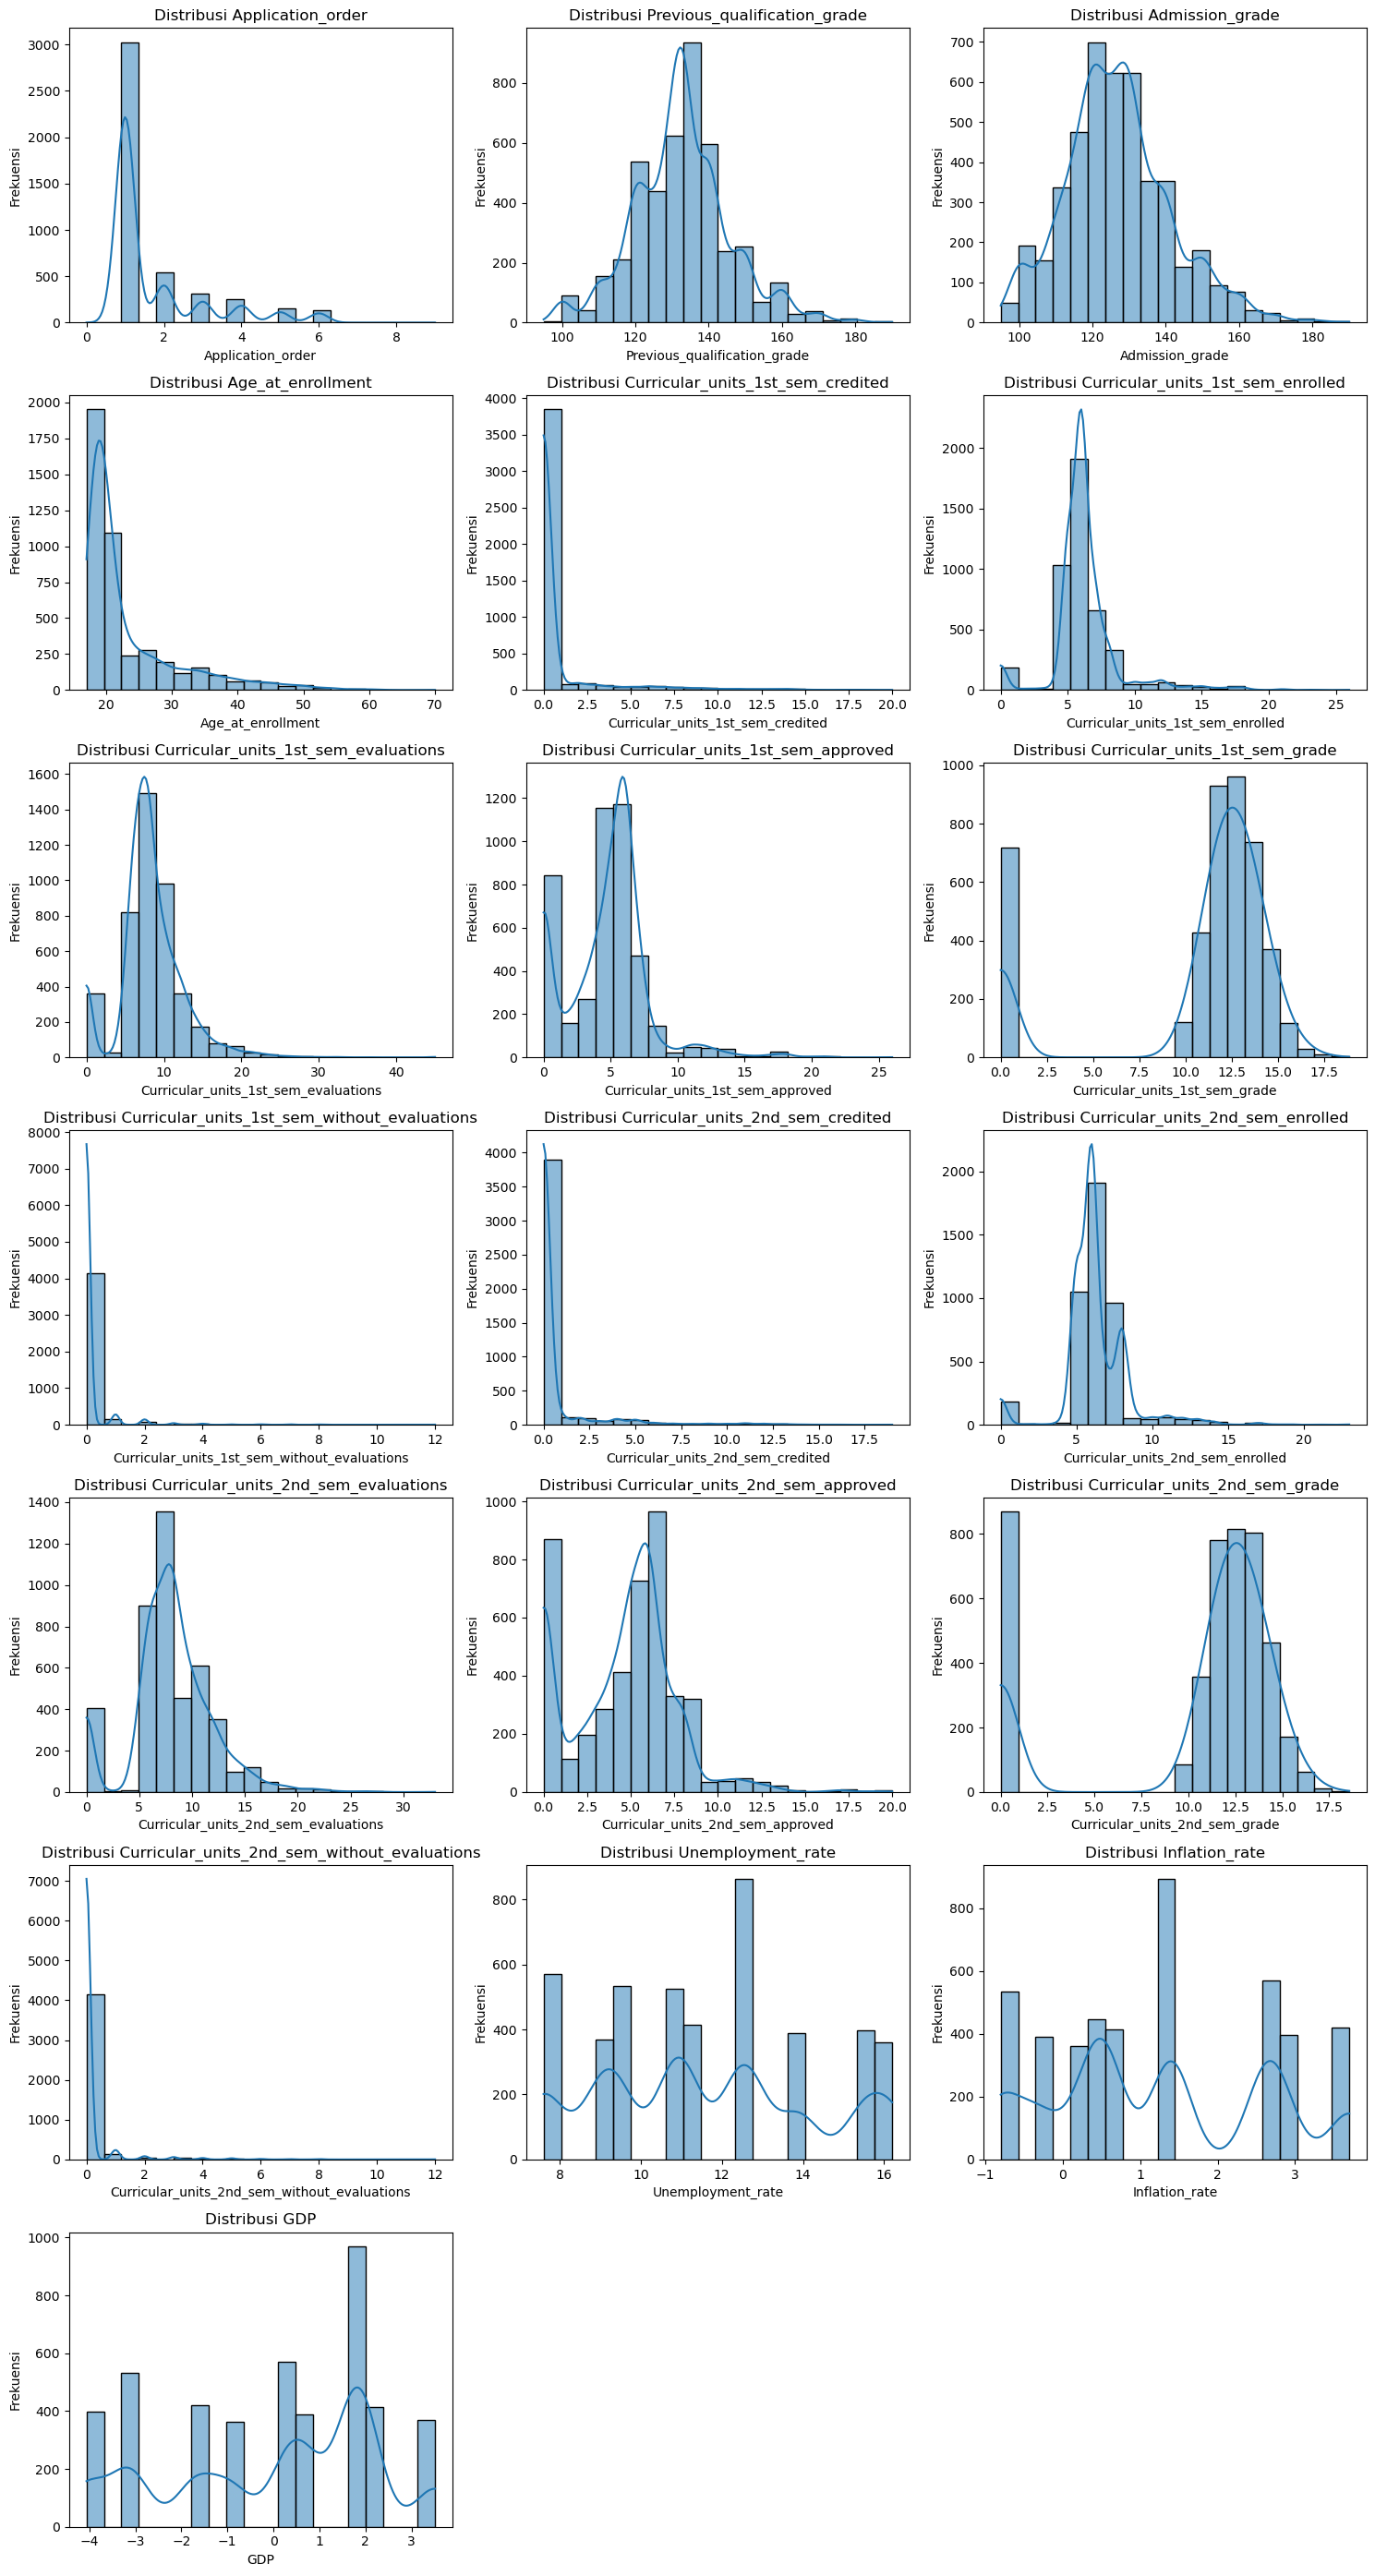

In [15]:
# Visualisasi Distribusi Kolom Numerik
n_cols = 3  # Number of columns for subplots (adjust as needed)
n_rows = len(numerical_columns) // n_cols + (len(numerical_columns) % n_cols != 0)

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))
axes = axes.ravel()

for i, col in enumerate(numerical_columns): 
    sns.histplot(df[col], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f"Distribusi {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frekuensi')

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Beberapa Distribusi Kolom Numerik**:
- Curricular_units_1st_sem_approved : Rata-rata units semester 1 yang disetujui adalah 4.7 units, maksimal 26 units, dan minimal 0
- Curricular_units_1st_sem_grade : Rata-rata grade pada semester 1 yaitu  harian adalah 10.6, maksimal 18.87 dan minimal 0
- Admission_grade: Dari rentang 0-200, rata-rata admission grademahasiswa yaitu 126, maksimal 190 dan minimal 95
- Application_order : Dari urutan 1 - 9, rata-rata application ordermahasiswa 1.7, maksimal 9 dan minimal 0
- Age_at_enrollment : Rata-rata usia mahasiswa saat enrollment adalah 23, maksimal 70 dan minimal 17
- Unemployment_rate : Rata-rata Unemployment_ratemahasiswa adalah 11.5, maksimal 16.2 dan minimal 7.6

#### Analisis Fitur Kategori

In [16]:
# Menampilkan bar chart dan pie chart untuk fitur kategorikal.
def pie_distribution(df, column_name):
    count = df[column_name].value_counts()
    percent = 100 * df[column_name].value_counts(normalize=True)
    stats_df = pd.DataFrame({'Jumlah': count, 'Persentase': percent.round(1)})

    print(f"\nDistribusi '{column_name}':\n", stats_df)

    plt.figure(figsize=(5,5))
    count.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
               colors=sns.color_palette("pastel"), textprops={'fontsize': 10})
    plt.title(f'Pie Chart - {column_name}')
    plt.ylabel('') 
    plt.tight_layout()
    plt.show()

In [17]:
def count_plot(data, x, hue=None, title='Data', figsize=(8, 4), rotate=0, palette='pastel'):
    plt.figure(figsize=figsize)
    ax = sns.countplot(data=data, x=x, hue=hue,
                       order=data[x].value_counts().index,
                       palette=palette)

    plt.title(f'Distribution of {title}')
    plt.xlabel(x.capitalize())
    plt.ylabel('Count')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Tambahkan label di atas bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom',
                        xytext=(0, 5), textcoords='offset points')

    if hue:
        plt.legend(loc='upper right', title=hue)

    plt.tight_layout()
    plt.xticks(rotation=rotate)
    plt.show()


Distribusi 'Status':
           Jumlah  Persentase
Status                      
Graduate    2209        49.9
Dropout     1421        32.1
Enrolled     794        17.9


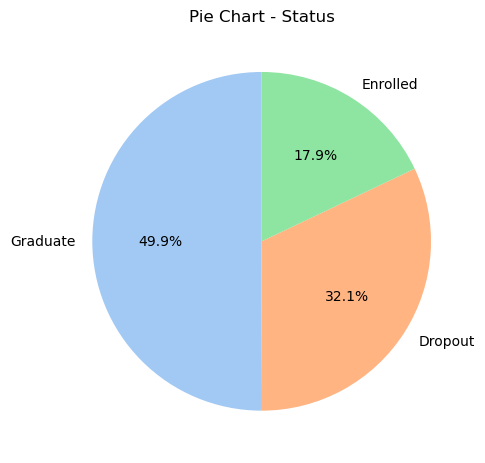

In [18]:
pie_distribution(df_categorical, "Status")

**Note Hasil Pie Distribusi Target**

Distribusi Target (`Status`)
- Graduate: 49.93%
- Dropout: 32.12%
- Enrolled : 17.95%
  
Artinya,  hampir setengah dari jumlahmahasiswa lulus dari pendidikan, tetapi `Dropout` dan `enrolled` tetap tinggi pada **32.12%** dan **17.95%**mahasiswa

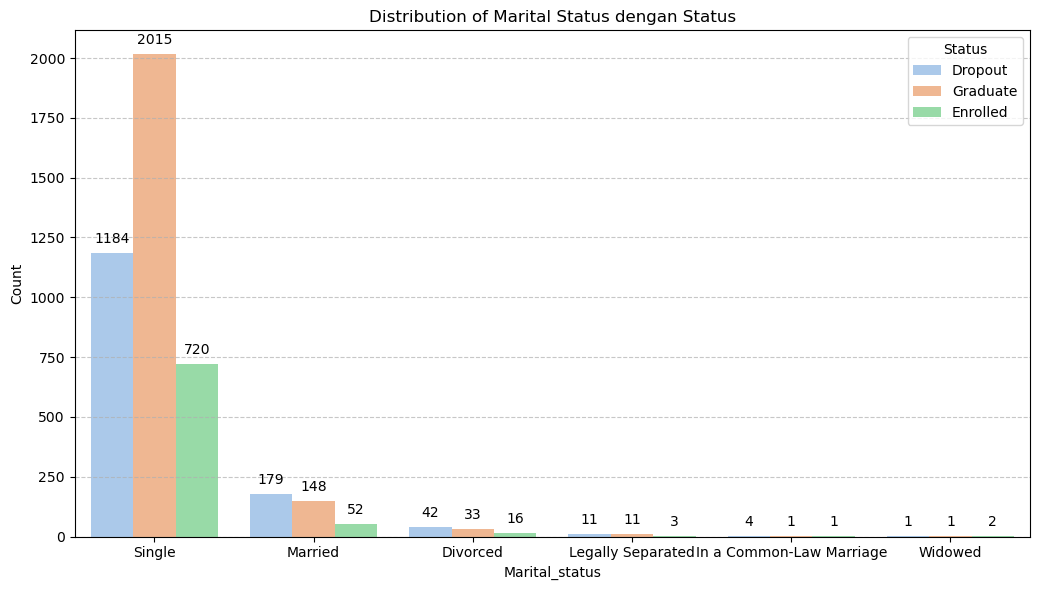

In [19]:
count_plot(df_categorical, x='Marital_status', hue='Status', title='Marital Status dengan Status', figsize=(10.5, 6))

**Note** : Sebagian besar siswa berstatus Lajang

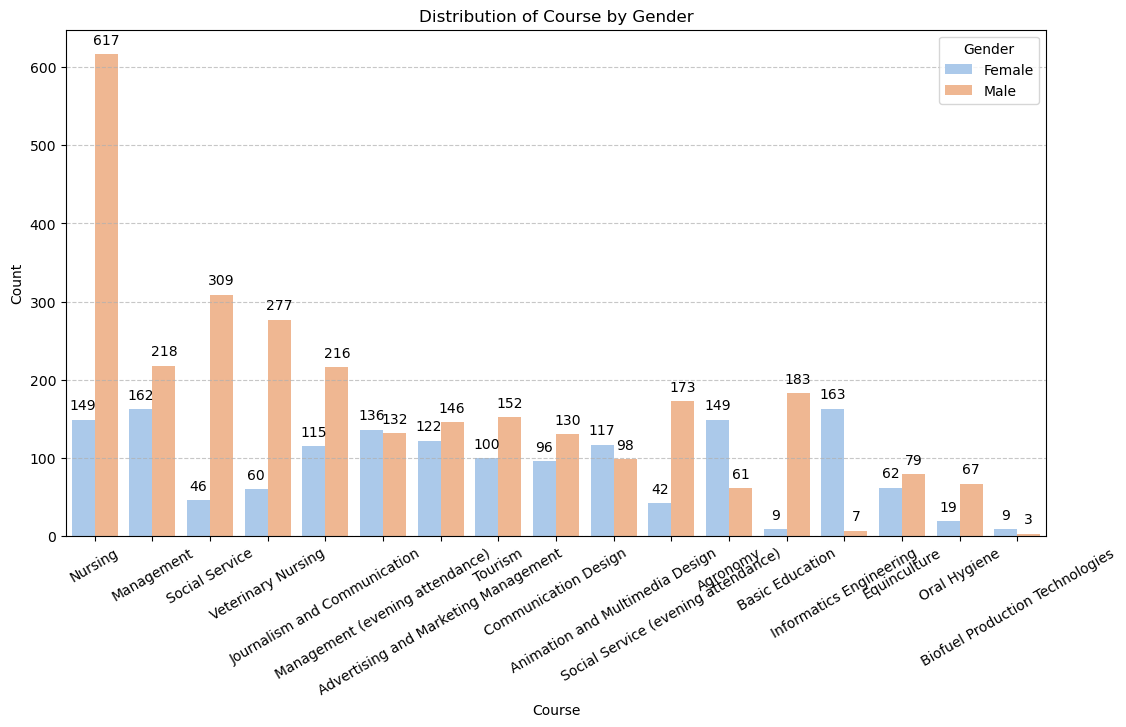

In [20]:
count_plot(df_categorical, 'Course', 'Gender', 'Course by Gender', (11.5, 6), 30)

**Note**: Program studi dengan data terbanyak adalah Keperawatan dengan jenis kelamin dominan adalah Perempuan. Sementara program studi dengan data paling sedikit adalah Teknologi Produksi Buofuel dengan dominasi Laki-laki. Selain itu, mahasiswa Laki-laki terbanyak ada di Program Studi Teknik Informatika dan Manajemen.

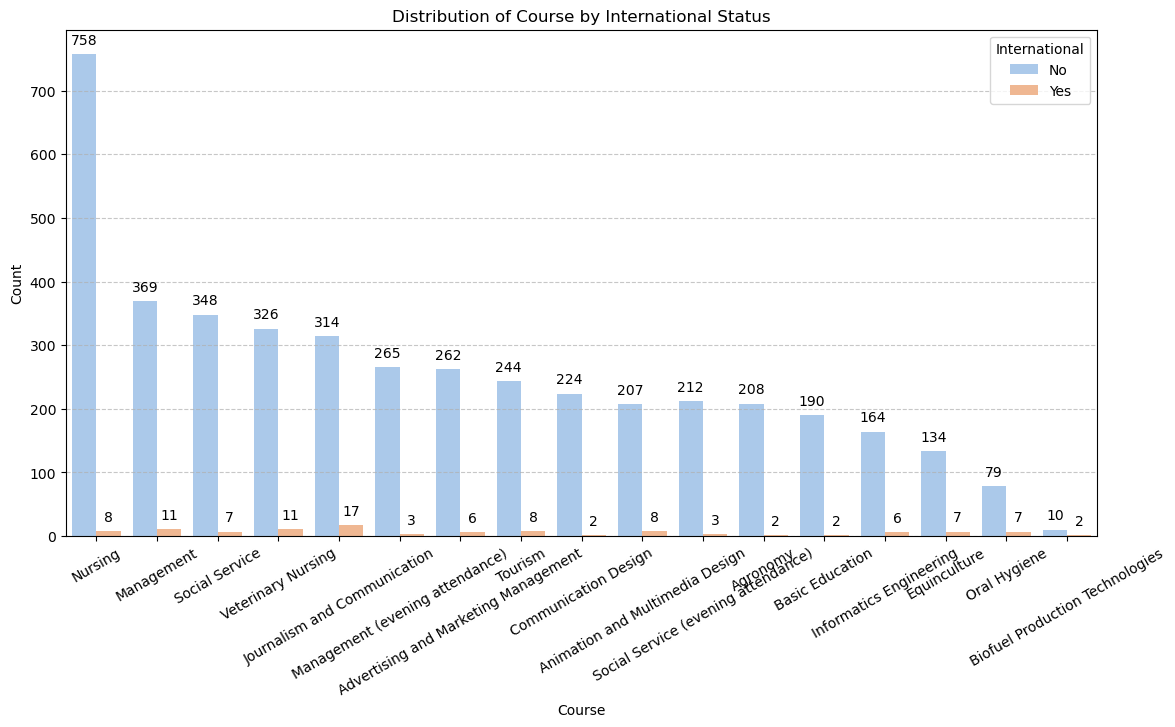

In [21]:
count_plot(df_categorical, 'Course', 'International', 'Course by International Status', (12, 6), 30)

**Note** : Secara keseluruhan, jumlah mahasiswa lokal lebih banyak daripada mahasiswa internasional. Mahasiswa internasional cenderung mengambil mata kuliah Jurnalisme dan Komunikasi.


Distribusi 'Daytime_evening_attendance':
                             Jumlah  Persentase
Daytime_evening_attendance                    
Daytime                       3941        89.1
Evening                        483        10.9


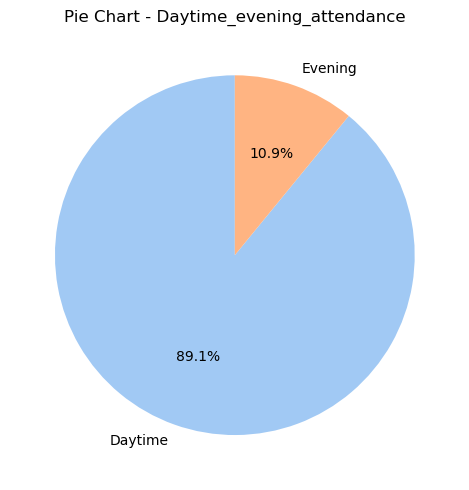

In [22]:
pie_distribution(df_categorical, "Daytime_evening_attendance")

**Note** : Siswa yang hadir pada siang hari mempunyai persentase tertinggi, yakni 89,1%, sedangkan siswa yang hadir pada malam hari hanya 10,9%.

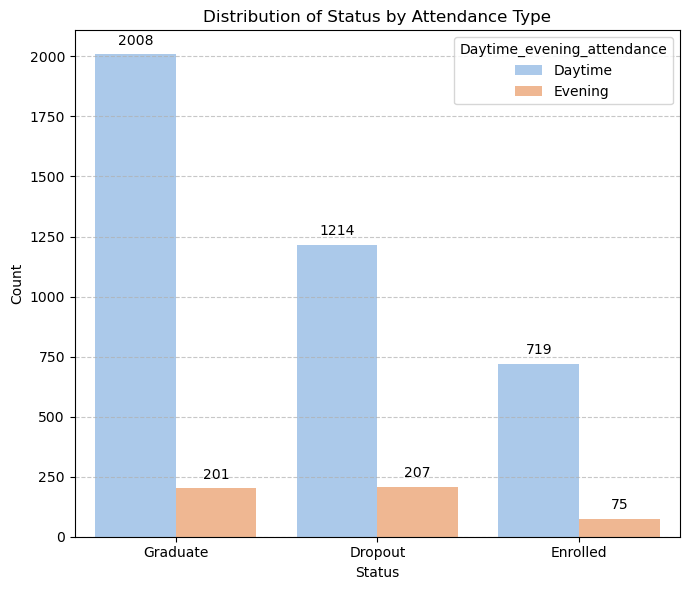

In [23]:
count_plot(df_categorical, 'Status', 'Daytime_evening_attendance', 'Status by Attendance Type', (7, 6))

**Note**: Kebanyakan siswa memilih belajar di kelas siang ketimbang kelas malam untuk semua tiga status, baik Gradiate, Dropout, atau Enrolled.


Distribusi 'Debtor':
         Jumlah  Persentase
Debtor                    
No        3921        88.6
Yes        503        11.4


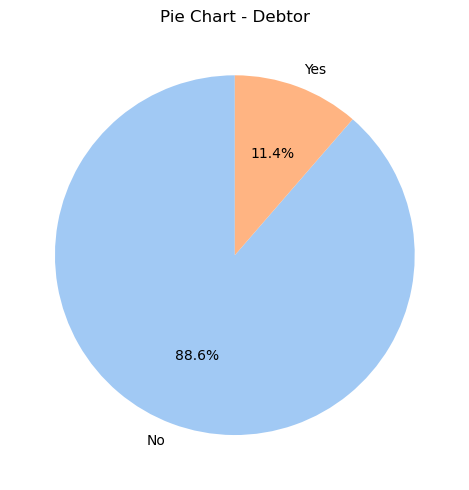

In [24]:
pie_distribution(df_categorical, "Debtor")

**Note** : Hanya 11,4% pelajar yang memiliki utang, sedangkan 88,6% tidak.

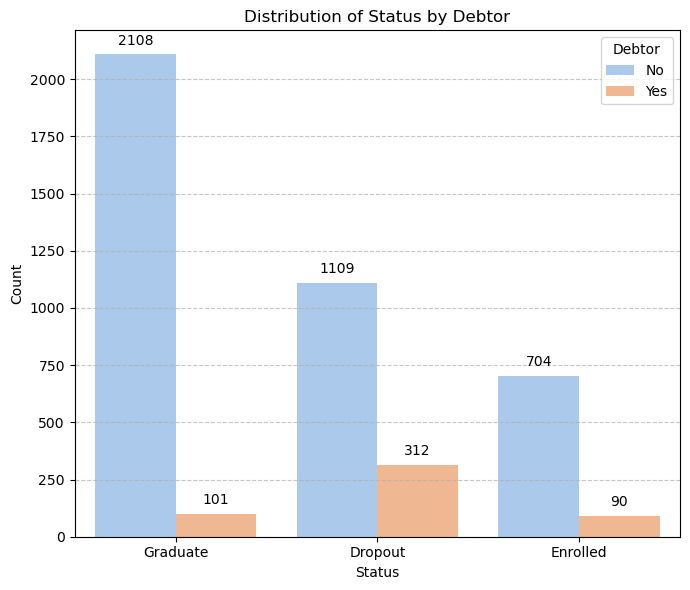

In [25]:
count_plot(df_categorical, 'Status', 'Debtor', 'Status by Debtor', (7, 6))

**Note**: Mahasiswa yang memiliki debitur adalah mereka yang Dropout sekolah dibandingkan dengan mereka yang Graduate atau Enrolled. Hal ini menggambarkan adanya faktor finansial yang sangat kuat terhadap tingkat kelulusan dan putus sekolah mahasiswa.


Distribusi 'Scholarship_holder':
                     Jumlah  Persentase
Scholarship_holder                    
No                    3325        75.2
Yes                   1099        24.8


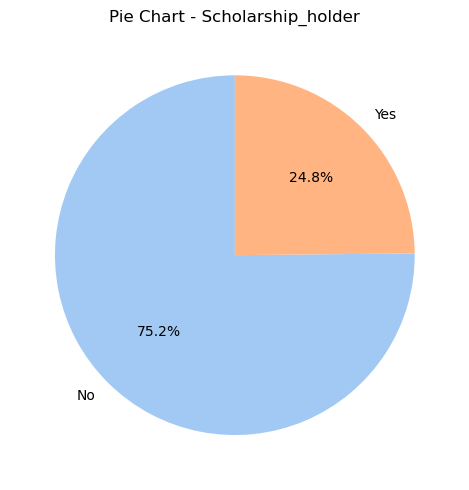

In [26]:
pie_distribution(df_categorical, "Scholarship_holder")

**Note**: Mahasiswa penerima beasiswa hanya 24,8% atau hampir 1/4 dari total populasi. Sementara yang tidak menerima beasiswa sebanyak 75,2%.

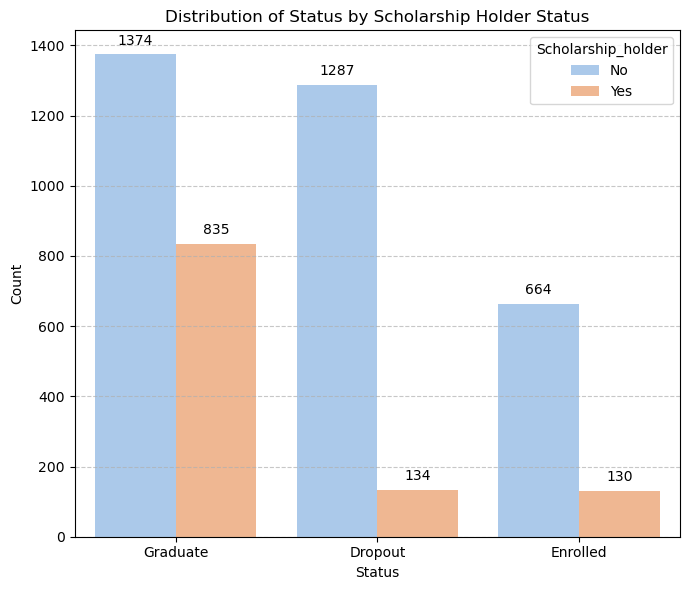

In [27]:
count_plot(df_categorical, 'Status', 'Scholarship_holder', 'Status by Scholarship Holder Status', (7, 6))

**Note**: Mahasiswa yang menerima beasiswa dan berstatus Graduate lebih banyak daripada mahasiswa yang Dropout. Jumlah mahasiswa yang menerima beasiswa dengan status dropout dan yang saat ini Enrolled hampir sama dan tidak jauh berbeda jumlahnya.

### Analisis Multivariate

#### Hubungan fitur numerik dengan Status

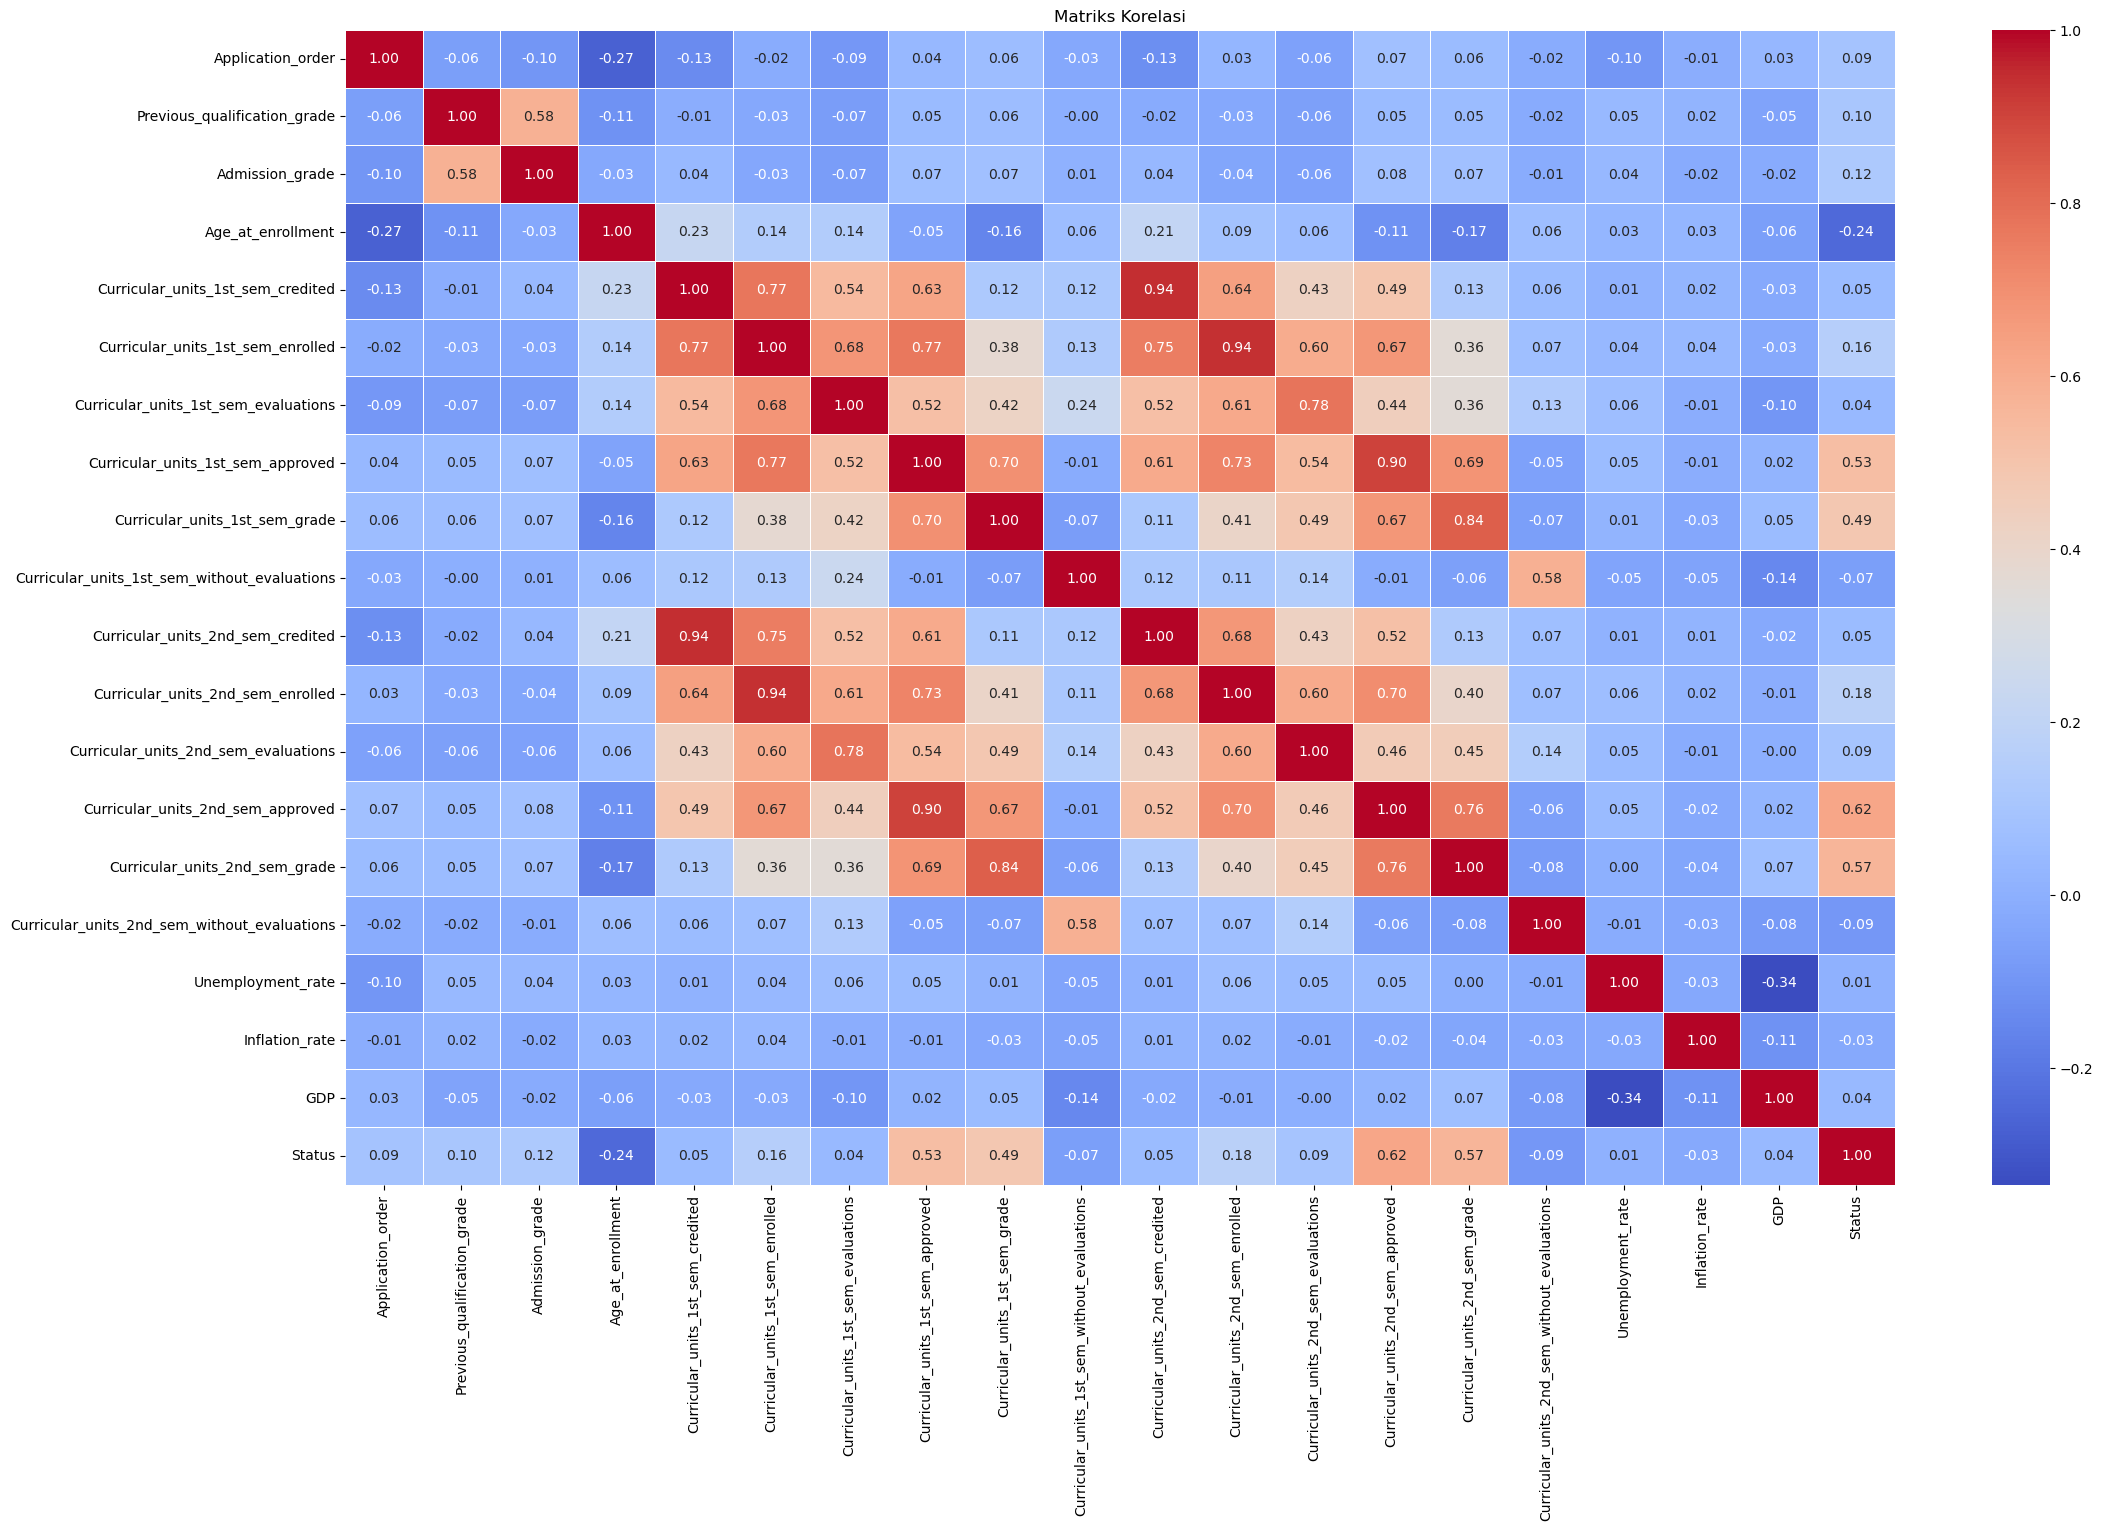

In [28]:
# Menganalisis matrix korelasi antar fitur-fitur numerik dengan status
num_col = df[numerical_columns]
num_col["Status"] = df["Status"].astype('category').cat.codes

# Hitung korelasi
num_corr_matrix = num_col.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(num_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi')
plt.show()

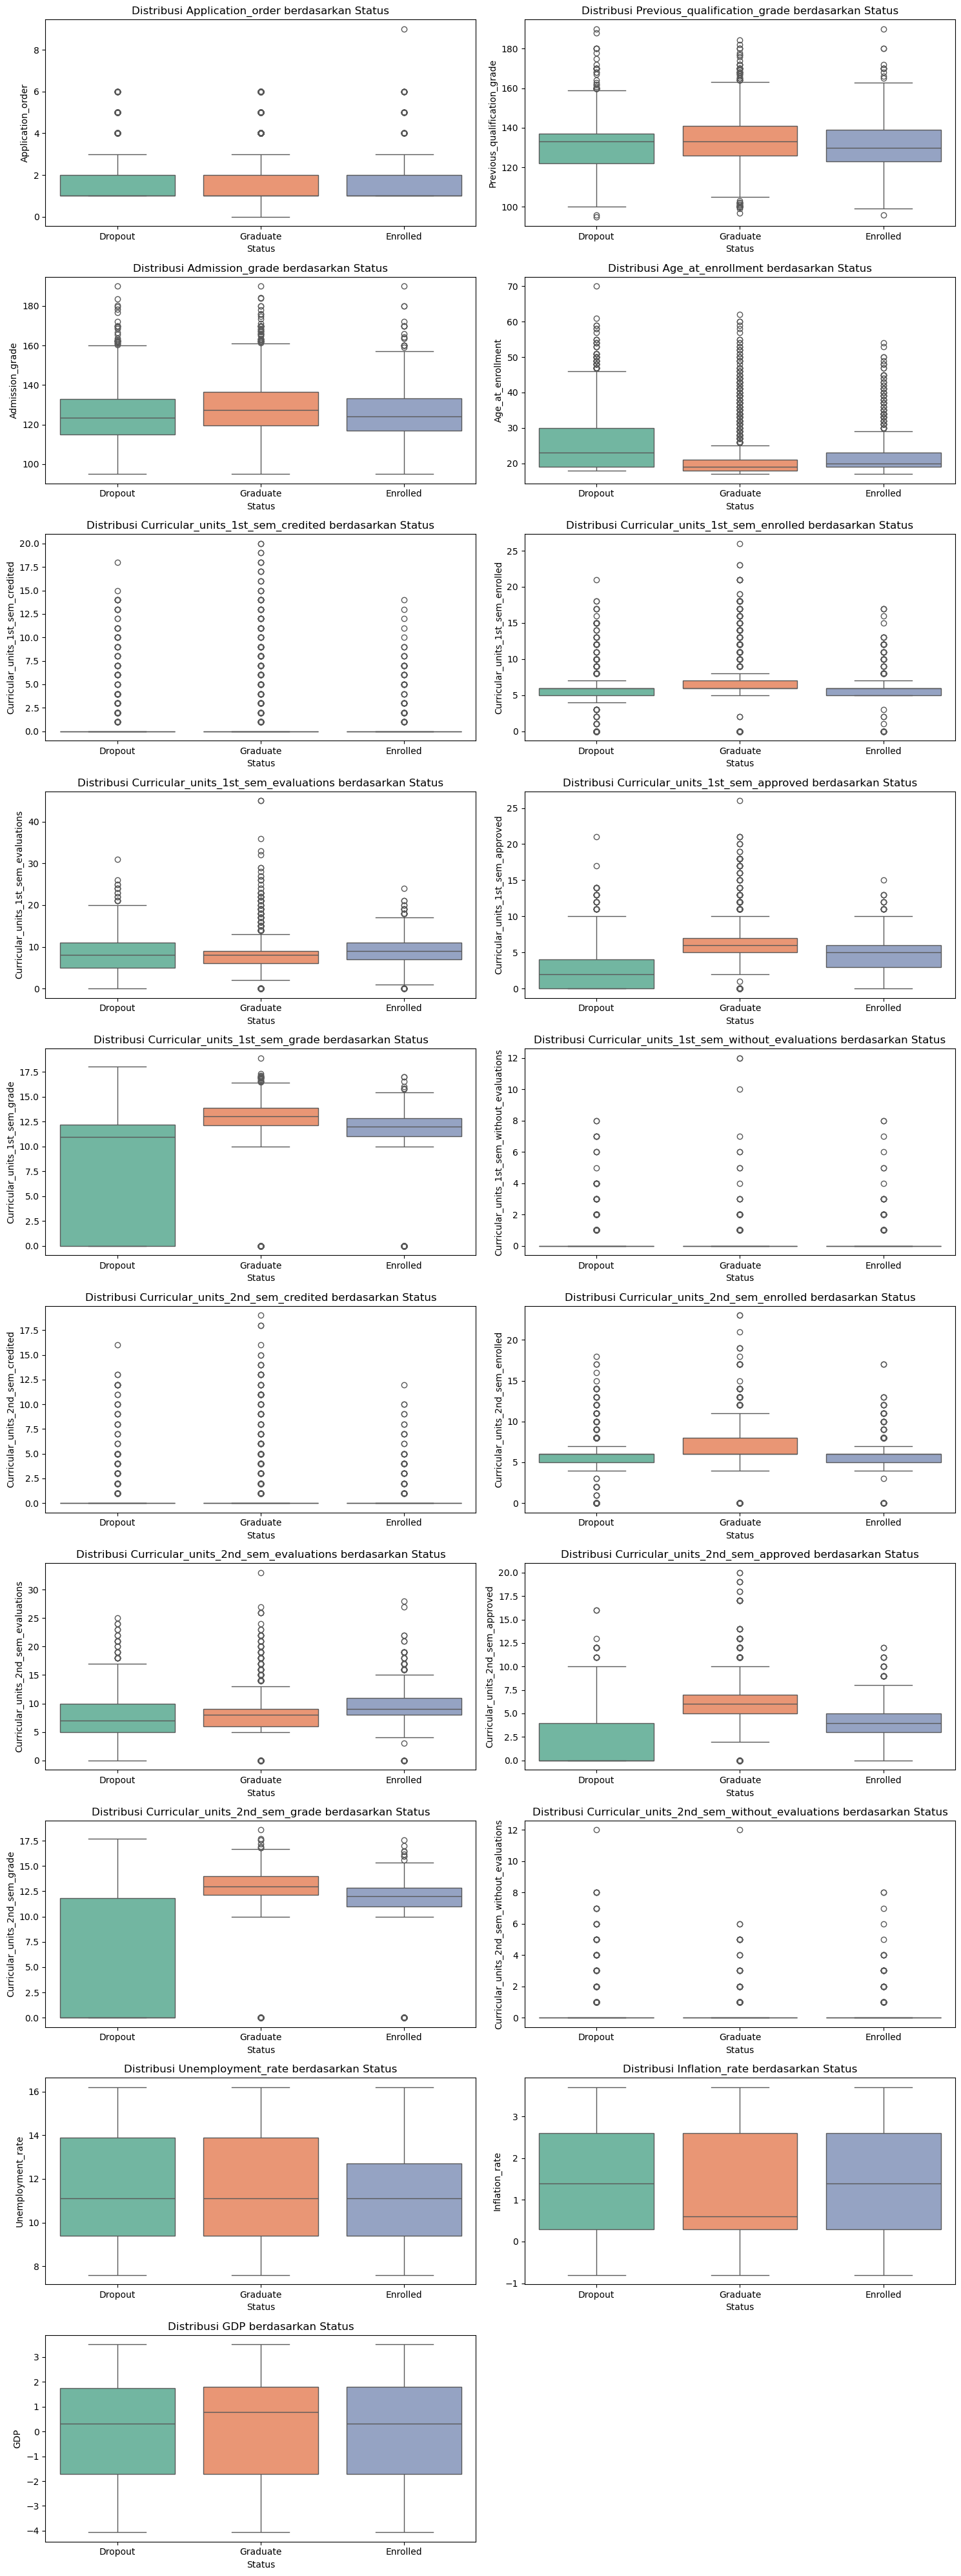

In [29]:
n_cols = 2
n_rows = len(numerical_columns) // n_cols + (len(numerical_columns) % n_cols != 0)
fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, n_rows * 4))
axs = axs.ravel()

for i, column in enumerate(numerical_columns):
    sns.boxplot(data=df_categorical, x='Status', y=column, hue='Status', palette="Set2", ax = axs[i])
    axs[i].set_title('Distribusi {} berdasarkan Status'.format(column))
    axs[i].set_xlabel("Status")
    axs[i].set_ylabel(column)

for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

**Note Hasil Analisis Beberapa Fitur**

  - Kolom `Age_at_enrollment`:mahasiswa dengan `Status Dropout` cenderung lebih tua ketika mendaftar dibandingkan mahasiswa yang graduate.
  - Kolom `Curricular_units_1st_sem_grade`:mahasiswa dengan `Status Dropout` memiliki jumlah units yang lebih rendah dibandingkan mahasiswa yang graduate.
  - Kolom `Curricular_units_2nd_sem_grade`:mahasiswa dengan `Status Dropout` memiliki jumlah units yang lebih rendah dibandingkanmahasiswa yang graduate.
  - Kolom `Curricular_units_1nd_sem_approved` :mahasiswa dengan `Status Dropout` memiliki jumlah approved units yang lebih rendah dibandingkan mahasiswa yang graduate.
  - Kolom `Curricular_units_2nd_sem_approved` :mahasiswa dengan `Status Dropout` memiliki jumlah approved units yang lebih rendah dibandingkan mahasiswa yang graduate.

### Analisis Multivariat

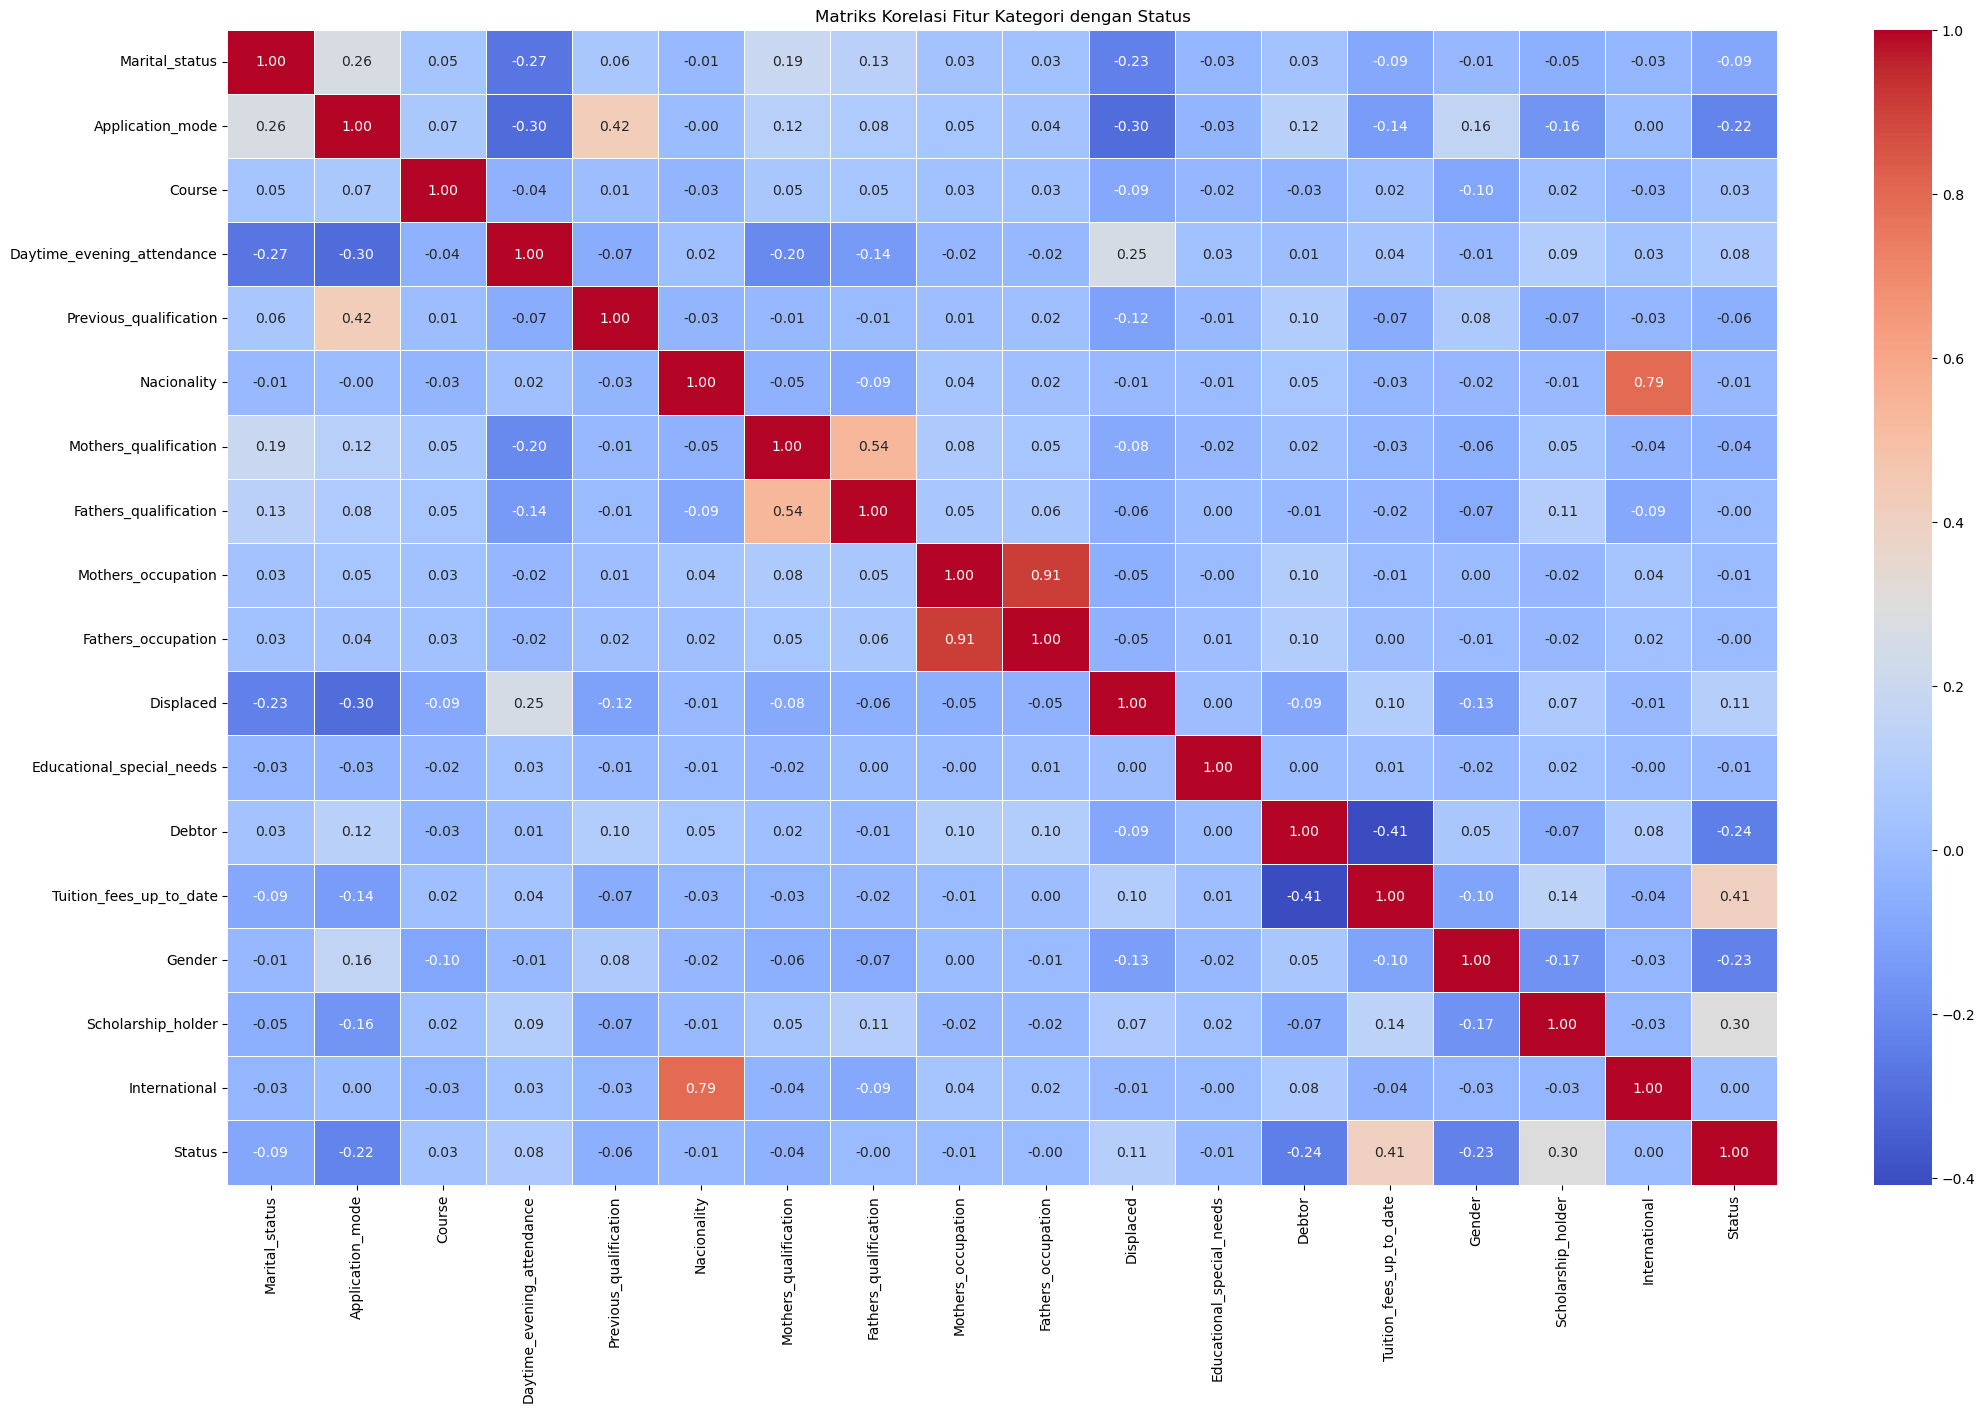

In [30]:
# Menganalisis matrix korelasi antar fitur-fitur kategorikal dengan status
cat_col = df[categorical_columns]
cat_col["Status"] = df["Status"].astype('category').cat.codes

# Hitung korelasi
cat_corr_matrix = cat_col.corr()
plt.figure(figsize=(25, 15))
sns.heatmap(cat_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi Fitur Kategori dengan Status')
plt.show()

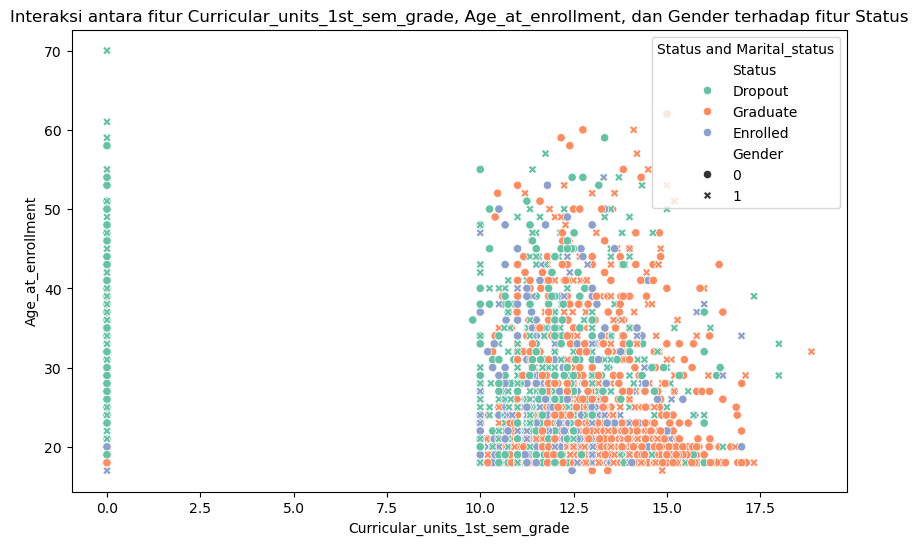

In [31]:
# Visualisasi interaksi antara MonthlyIncome dan OverTime terhadap Status
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Curricular_units_1st_sem_grade", y="Age_at_enrollment", hue="Status", style="Gender", palette="Set2")
plt.title("Interaksi antara fitur Curricular_units_1st_sem_grade, Age_at_enrollment, dan Gender terhadap fitur Status")
plt.xlabel("Curricular_units_1st_sem_grade")
plt.ylabel("Age_at_enrollment")
plt.legend(title="Status and Marital_status")
plt.show()

**Note Analisis Interaksi Fitur**:

Gambar di atas menunjukkan interaksi antara kolom `Age_at_enrollment`, `Gender` dan `Curricular_units_1st_sem_grade` terhadap `Status`

1. `Status` dan `Age_at_enrollment`
      - Mahasiswa yang dropout cenderung memiliki variasi usia yang lebih luas, termasuk banyak yang berada di rentang usia lebih tinggi (di atas 30 tahun), dibandingkan yang lulus.
      - Mahasiswa yang graduate lebih terkonsentrasi di usia muda (sekitar 18–25 tahun), yang merupakan usia ideal masuk perguruan tinggi.

2. `Status` dan `Gender`
      - Tampak tidak ada perbedaan pola visual yang sangat jelas antara simbol o (0) dan x (1), menunjukkan bahwa gender mungkin bukan faktor dominan dalam menentukan dropout vs graduate pada visual ini.
      - Bahkan pada grafik Perbandingan Gender terhadap Status Mahasiswa tidak ada perbandingan grafik yang signifikan dari `Status Dropout`
        
3. `Status` dan `Curricular_units_1st_sem_grade`
   - Mahasiswa yang mendapatkan nilai rendah di semester pertama (di bawah 10) lebih banyak berasal dari kelompok dropout.
   - Sebaliknya, mahasiswa dengan nilai tinggi (12 ke atas) lebih banyak berada di kelompok graduate, menandakan kinerja akademik awal berkorelasi dengan kelulusan.
    
4. Interaksi Ketiga Variabel
      - Mahasiswa yang cenderung lebih tua dengan nilai pada semester satu yang rendah Status Dropout yang lebih tinggi, namun gender tidak mempengaruhi

Dari visualisasi scatterplot MonthlyIncome vs Age dengan pengaruh OverTime dan Status:
1. `Age_at_enrollment`: mahasiswa dengan usia saat pendaftaran lebih tua cenderung memiliki Status Dropout lebih tinggi (ditunjukkan oleh titik berwarna hijau diposisi atas grafik).
2. `Curricular_units_1st_sem_grade`: mahasiswa yang memiliki nilai semester satu yang buruk, terutama jika usia mereka lebih tua cenderung memiliki Status Dropout (ditunjukkan oleh titik berwarna hijau di pojok kiri grafik)

**Insight**

Mahasiswa dengan usia pendaftaran yang lebih tua dan nilai akademik awal yang rendah cenderung memiliki kemungkinan dropout yang lebih tinggi, menunjukkan bahwa faktor usia dan performa awal berperan signifikan dalam keberhasilan studi.

## Data Preparation

In [32]:
le = LabelEncoder()
df['Status'] = le.fit_transform(df['Status'])

dict(zip(le.classes_, le.transform(le.classes_)))

{'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}

In [33]:
df = df[df['Status'] != 1]
df = df.reset_index(drop=True)
df.loc[:, 'Status'] = df['Status'].replace({2: 1})

In [34]:
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


### Melakukan Feature Selection

In [74]:
df_filtered = df.loc[:, df.corr()['Status'].abs().ge(0.1)]
df_filtered

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
0,1,17,122.0,127.3,1,0,1,1,0,20,0,0,0.000000,0,0,0,0.000000,0,0
1,1,15,160.0,142.5,1,0,0,1,0,19,6,6,14.000000,6,6,6,13.666667,0,1
2,1,1,122.0,124.8,1,0,0,1,0,19,6,0,0.000000,6,0,0,0.000000,0,0
3,1,17,122.0,119.6,1,0,1,0,0,20,6,6,13.428571,6,10,5,12.400000,0,1
4,2,39,100.0,141.5,0,0,1,0,0,45,6,5,12.333333,6,6,6,13.000000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1,1,125.0,122.2,0,0,1,1,0,19,6,5,13.600000,6,8,5,12.666667,0,1
3626,1,1,120.0,119.0,1,1,0,0,0,18,6,6,12.000000,6,6,2,11.000000,0,0
3627,1,1,154.0,149.5,1,0,1,0,1,30,7,7,14.912500,8,9,1,13.500000,0,0
3628,1,1,180.0,153.8,1,0,1,0,1,20,5,5,13.800000,5,6,5,12.000000,0,1


In [37]:
print("Fitur yang memiliki corelatif > 0.1 dengan Status")
list(df_filtered.columns)

Fitur yang memiliki corelatif > 0.1 dengan Status


['Marital_status',
 'Application_mode',
 'Previous_qualification_grade',
 'Admission_grade',
 'Displaced',
 'Debtor',
 'Tuition_fees_up_to_date',
 'Gender',
 'Scholarship_holder',
 'Age_at_enrollment',
 'Curricular_units_1st_sem_enrolled',
 'Curricular_units_1st_sem_approved',
 'Curricular_units_1st_sem_grade',
 'Curricular_units_2nd_sem_enrolled',
 'Curricular_units_2nd_sem_evaluations',
 'Curricular_units_2nd_sem_approved',
 'Curricular_units_2nd_sem_grade',
 'Curricular_units_2nd_sem_without_evaluations',
 'Status']

In [38]:
df_filtered.describe()

,Previous_qualification_grade,Admission_grade,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Status
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,132.920606,127.293939,23.461157,6.337466,4.791460,10.534860,6.296419,7.763085,4.518457,10.036155,0.142149,0.608540
std,13.238373,14.611295,7.827994,2.570773,3.237845,5.057694,2.263020,3.964163,3.162376,5.481742,0.747670,0.488144
min,95.000000,95.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.000000,118.000000,19.000000,5.000000,3.000000,11.000000,5.000000,6.000000,2.000000,10.517857,0.000000,0.000000
50%,133.100000,126.500000,20.000000,6.000000,5.000000,12.341429,6.000000,8.000000,5.000000,12.333333,0.000000,1.000000
75%,140.000000,135.100000,25.000000,7.000000,6.000000,13.500000,7.000000,10.000000,6.000000,13.500000,0.000000,1.000000
max,190.000000,190.000000,70.000000,26.000000,26.000000,18.875000,23.000000,33.000000,20.000000,18.571429,12.000000,1.000000


In [39]:
df_filtered.to_csv('./document_result/student_data_filtered.csv', index=False)

**Note Hasil Feature Selection dengan Correlation Matrix terhadap Status**:
1. Hasil feature selection menggunakan metode Correlation Matrix menunjukkan bahwa fitur-fitur yang paling relevan untuk model prediksi pada data ini
2. Fitur tersebut adalah:
    - Marital_status,
    - Application_mode,
    - Previous_qualification_grade,
    - Admission_grade,
    - Displaced,
    - Debtor,
    - Tuition_fees_up_to_date,
    - Gender,
    - Scholarship_holder,
    - Age_at_enrollment,
    - Curricular_units_1st_sem_enrolled,
    - Curricular_units_1st_sem_approved,
    - Curricular_units_1st_sem_grade,
    - Curricular_units_2nd_sem_enrolled,
    - Curricular_units_2nd_sem_evaluations,
    - Curricular_units_2nd_sem_approved,
    - Curricular_units_2nd_sem_grade,
    - Curricular_units_2nd_sem_without_evaluations
3. Hasil seleksi fitur ini akan digunakan untuk fitur training model
   

### Scaling Data Numerik

In [79]:
# Menyelaraskan skala fitur numerik pada pandas df_clean
numerical_features_validated = df_filtered.select_dtypes(include=[np.number]).columns.tolist()
numerical_features_validated.remove("Status")
scaler = MinMaxScaler()
df_filtered[numerical_features_validated] = scaler.fit_transform(df_filtered[numerical_features_validated])

### Encoding Data Kategorikal

In [80]:
# Encoding Fitur Kategorikal
encoder = LabelEncoder()
categorical_features_validated  = df_filtered.select_dtypes(exclude=[np.number]).columns.tolist()
for feature in categorical_features_validated:
    df_filtered[feature] = encoder.fit_transform(df_filtered[feature])
df_filtered[categorical_features_validated].head()

,Marital_status,Application_mode,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder
0,0,7,1,0,1,1,0
1,0,5,1,0,0,1,0
2,0,0,1,0,0,1,0
3,0,7,1,0,1,0,0
4,1,11,0,0,1,0,0


### Split Data

In [81]:
# Split data menjadi X dan Y
X = df_filtered.drop(['Status'], axis=1)
y = df_filtered['Status']

In [82]:
X.head()

,Marital_status,Application_mode,Previous_qualification_grade,Admission_grade,Displaced,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations
0,0,7,0.284211,0.340000,1,0,1,1,0,0.056604,0.000000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,0.0
1,0,5,0.684211,0.500000,1,0,0,1,0,0.037736,0.230769,0.230769,0.741722,0.26087,0.181818,0.30,0.735897,0.0
2,0,0,0.284211,0.313684,1,0,0,1,0,0.037736,0.230769,0.000000,0.000000,0.26087,0.000000,0.00,0.000000,0.0
3,0,7,0.284211,0.258947,1,0,1,0,0,0.056604,0.230769,0.230769,0.711447,0.26087,0.303030,0.25,0.667692,0.0
4,1,11,0.052632,0.489474,0,0,1,0,0,0.528302,0.230769,0.192308,0.653422,0.26087,0.181818,0.30,0.700000,0.0


### Data Resampling

In [83]:
# Resampling dengan SMOTE untuk menyeimbangkan data
smote = SMOTE(random_state=20241124)
X_smote, y_smote = smote.fit_resample(X, y)

y_counter = collections.Counter(y)
y_smote_counter = collections.Counter(y_smote)

df_smote = pd.DataFrame({
    'None': y_counter,
    'SMOTE': y_smote_counter
})

df_smote.loc['Total'] = [sum(y_counter.values()), sum(y_smote_counter.values())]
df_smote

,None,SMOTE
0,1421,2209
1,2209,2209
Total,3630,4418


### Train test Split Data

In [84]:
# Split X dan y hasil smote menjadi data training dan validasi
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=20241116, stratify=y_smote)

print('X_train :', X_train.shape)
print('y_train :', y_train.shape)
print('X_test  :', X_test.shape)
print('y_test  :', y_test.shape)

X_train : (3534, 18)
y_train : (3534,)
X_test  : (884, 18)
y_test  : (884,)


In [85]:
# Menampilkan summary data training dan validasi
print("Selected Features :", list(df_filtered.columns))
print("X_train Shape :", X_train.shape)
print("X_test Shape :", X_test.shape)
print("y_train Distribution :", y_train.value_counts())
print("y_test Distribution :", y_test.value_counts())

Selected Features : ['Marital_status', 'Application_mode', 'Previous_qualification_grade', 'Admission_grade', 'Displaced', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Status']
X_train Shape : (3534, 18)
X_test Shape : (884, 18)
y_train Distribution : Status
1    1767
0    1767
Name: count, dtype: int64
y_test Distribution : Status
1    442
0    442
Name: count, dtype: int64


# Modeling dan Evaluasi

### Training Model

In [90]:
# Menentukan model yang akan ditraining
models = {
    'LR': LogisticRegression(class_weight='balanced', max_iter=10000),
    'SVM': SVC(class_weight='balanced', max_iter=10000),
    'DT': DecisionTreeClassifier(class_weight='balanced'),
    'GB': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(class_weight='balanced'),
    'KNN': KNeighborsClassifier(),
    'NB': GaussianNB()
}

# Menentukan Matrik evaluasi model
metrics = {metric: [] for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']}

# Fit models and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    metrics['Accuracy'].append(accuracy_score(y_test, pred))
    metrics['Precision'].append(precision_score(y_test, pred))
    metrics['Recall'].append(recall_score(y_test, pred))
    metrics['F1-Score'].append(f1_score(y_test, pred))

In [91]:
# Create a DataFrame from the collected metrics
model_metrics = pd.DataFrame(metrics, index=models.keys())
model_metrics

,Accuracy,Precision,Recall,F1-Score
LR,0.909502,0.900442,0.920814,0.910515
SVM,0.842760,0.788571,0.936652,0.856256
DT,0.877828,0.876126,0.880090,0.878104
GB,0.927602,0.910870,0.947964,0.929047
RF,0.927602,0.907328,0.952489,0.929360
KNN,0.878959,0.874720,0.884615,0.879640
NB,0.829186,0.784736,0.907240,0.841553


**Note hasil Training Beberapa Model**
1. Random Forest (RF) memiliki skor tertinggi pada semua metrik utama (Accuracy: 92.7%, F1: 92.9%)
2. Model RF sangat cocok untuk performa tinggi secara umum, terutama dalam menangkap semua kasus positif (high recall)
3. Selanjunya akan digunakan Random Forest sebagai model utama
4. Sebelum digunakan, model akan dituning dan ditraining kembali untuk hasil yang maksimal

### Tuning Model Random Forest

In [97]:
# Hyperparameter tuning on base model using Grid Search Cross Validation
param_grid = {
    'n_estimators': [100, 150, 200, 250, 500],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced']
}

clf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=3, n_jobs=-1, verbose=3, scoring='accuracy')
clf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 150, 200, 250, 500]},
             scoring='accuracy', verbose=3)

In [98]:
clf.best_params_

{'class_weight': 'balanced', 'criterion': 'entropy', 'n_estimators': 150}

In [99]:
clf.best_score_

0.9156762874929258

### Membangun model Random Forest (RF)

In [100]:
# Membuat model RF
classifierRF = RandomForestClassifier(class_weight='balanced', criterion='entropy', n_estimators=150)
classifierRF.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=150)

### Evaluation

In [102]:
# Melakukan evaluasi model RF
predictions_RF = classifierRF.predict(X_test)
RF_accuracy = accuracy_score(predictions_RF, y_test)*100
RF_accuracy = round(RF_accuracy,1)
print(RF_accuracy)

92.9


In [103]:
# Menampilkan matrix report hasil evaluasi model RF
print(classification_report(y_test, predictions_RF))

              precision    recall  f1-score   support

           0       0.95      0.90      0.93       442
           1       0.91      0.95      0.93       442

    accuracy                           0.93       884
   macro avg       0.93      0.93      0.93       884
weighted avg       0.93      0.93      0.93       884



**Note hasil training model RF dengan tuning parameter**:
1. Accuracy sebesar 0.93 menunjukkan model secara keseluruhan memprediksi dengan benar 93% dari total data. Ini merupakan performa sangat baik dan stabil.
2. Macro avg & Weighted avg = 0.93 untuk semua metrik menunjukkan bahwa model bekerja seimbang untuk kedua kelas (tidak berat sebelah)

#### Most Impact Feature

In [119]:
result = permutation_importance(classifierRF, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.Series(result.importances_mean, index=X_test.columns).sort_values(ascending=False)
importance_df = importance_df.reset_index()
importance_df.columns = ["Feature", "Importance"]

In [40]:
print("Permutation Importance pada model Random Forest")
print(importance_df)

Permutation Importance pada model Random Forest
                                         Feature  Importance
0              Curricular_units_2nd_sem_approved    0.271760
1              Curricular_units_1st_sem_approved    0.129007
2                 Curricular_units_2nd_sem_grade    0.115838
3                 Curricular_units_1st_sem_grade    0.068302
4                        Tuition_fees_up_to_date    0.054202
5                                Admission_grade    0.053789
6           Curricular_units_2nd_sem_evaluations    0.051429
7                   Previous_qualification_grade    0.045180
8                              Age_at_enrollment    0.043140
9              Curricular_units_2nd_sem_enrolled    0.040440
10             Curricular_units_1st_sem_enrolled    0.039076
11                              Application_mode    0.024397
12                            Scholarship_holder    0.020946
13                                        Debtor    0.011957
14                                   

In [122]:
importance_df.to_csv("./document_result/permutation_importance_RF.csv")

**Note Hasil Permutation Importance pada model SVM**:
- Curricular_units_2nd_sem_approved (0.272) adalah fitur paling dominan, menunjukkan pengaruh terbesar dalam menentukan prediksi mahasiswa akan lulus atau dropout.
- Curricular_units_1st_sem_approved (0.129) dan Curricular_units_2nd_sem_grade (0.116) masih memberikan kontribusi penting, meskipun nilainya setengah dari fitur utama.
- Curricular_units_1st_sem_grade (0.068), Tuition_fees_up_to_date (0.054), dan Admission_grade (0.054) termasuk fitur dengan pengaruh sedang—relevan secara statistik terhadap performa mahasiswa.
- Fitur lain seperti Curricular_units_2nd_sem_evaluations, Previous_qualification_grade, Age_at_enrollment, Curricular_units_2nd_sem_enrolled, dan Curricular_units_1st_sem_enrolled berada di kisaran 0.04–0.05, menunjukkan pengaruh kecil namun tetap terukur.
- Application_mode (0.024), Scholarship_holder (0.021), Debtor (0.012), Gender (0.011), dan Displaced (0.010) memiliki nilai importance rendah, sehingga hanya memberi pengaruh marginal terhadap prediksi.
- Fitur seperti Curricular_units_2nd_sem_without_evaluations (0.006) dan Marital_status (0.003) hampir tidak memberi kontribusi, dan berpotensi diabaikan dari model tanpa mengurangi performa.
   
**Kesimpulan:**
- Fitur akademik semester 2, terutama jumlah mata kuliah yang disetujui/lulus, adalah indikator paling penting terhadap status akhir mahasiswa.
- Status pembayaran SPP (Tuition_fees_up_to_date) dan prestasi semester 1 dan 2 juga berperan signifikan.
- Faktor demografi seperti gender, status pernikahan, atau beasiswa hanya memberi kontribusi kecil terhadap prediksi dan bisa dianggap pelengkap.

In [38]:
# Load Saved Model
with open('./SVM_model.pkl', 'rb') as file:
    model = pickle.load(file)

In [ ]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.Series(result.importances_mean, index=X_test.columns).sort_values(ascending=False)
importance_df = importance_df.reset_index()
importance_df.columns = ["Fitur", "Importance"]

#### Save Model

In [110]:
with open('./RF_model.pkl', 'wb') as file:
    pickle.dump(classifierRF, file)

# Conclusion

Proyek ini bertujuan untuk menggali faktor-faktor yang memengaruhi tingkat Status Dropout di Institusi Jaya Jaya Maju, serta membangun model prediktif yang dapat mengidentifikasi mahasiswa dengan risiko keluar tinggi. Berikut adalah temuan dan wawasan berharga yang berhasil diperoleh:

### 1. Faktor-Faktor Penyebab Status
Berdasarkan hasil analisis data dan model prediktif, berikut adalah faktor-faktor utama yang memengaruhi status kelulusan atau dropout mahasiswa:
1. **Curricular_units_2nd_sem_approved**
   - Jumlah mata kuliah yang disetujui pada semester 2 sangat berpengaruh terhadap keberhasilan mahasiswa.
2. **Curricular_units_1st_sem_approved**
    - Capaian di semester pertama juga memberi dampak, meski lebih kecil dibanding semester kedua.
3. **Curricular_units_2nd_sem_grade**
    - Nilai akademik di semester kedua mencerminkan pencapaian belajar dan konsistensi mahasiswa.
4. **Curricular_units_1nd_sem_grade**
    - Nilai akademik di semester satu mencerminkan pencapaian belajar dan konsistensi mahasiswa.
5. **Tuition_fees_up_to_date_1**
    - Status pembayaran uang kuliah menjadi indikator penting yang berkorelasi dengan risiko dropout.

      
### 2. Model Prediktif Terbaik
Model terbaik yang digunakan dalam proyek ini adalah **Random Forest (RF)**, dengan metrik performa weighted average sebagai berikut:
- **Accuracy**: 0.93
- **Precision**: 0.93
- **Recall**: 0.93
- **F1-Score**: 0.93

Model ini menunjukkan performa terbaik dibandingkan model lainnya seperti Linear Regression, K-Nearest Neighbors (KNN), Support Vectore Machine, Naive Bayes, Decision Tree, dan Gradien Boosting

### Jawaban terhadap Pertanyaan Institusi
**1. Apa faktor utama yang memengaruhi Status Mahasiswa?**

Faktor utama adalah performa akademik pada semester kedua dan status pembayaran uang kuliah, khususnya:
- Curricular_units_2nd_sem_approved
- Curricular_units_1nd_sem_approved
- Curricular_units_2nd_sem_grade
- Curricular_units_1nd_sem_grade
- Tuition_fees_up_to_date
  
**2. Bagaimana tingkat performa awal memengaruhi Status Mahasiswa?**
- Performa pada semester pertama (Curricular_units_1st_sem_approved) memiliki pengaruh yang penting, nilai awal semester (Curricular_units_1st_sem_grade) memiliki pengaruh yang sedang dan nilai saat masuk (Admission_grade) berpengaruh kecil.

  
**3. Apa pola perilaku Mahasiswa dengan risiko keluar tinggi?**

- Mahasiswa dengan sedikit mata kuliah yang disetujui di semester 1 dan 2, nilai rendah, serta tunggakan pembayaran cenderung memiliki risiko dropout tinggi.
  
**4. Apakah kita memiliki alat bantu untuk memantau Status Mahasiswa?**
- Ya, model prediktif yang dibangun dapat dijadikan dasar untuk dashboard monitoring risiko dropout, dengan kemungkinan integrasi ke sistem akademik.

### Karakteristik Umum Mahasiswa yang Dropout
Berdasarkan analisis data, berikut adalah karakteristik umum mahasiswa yang melakukan dropout:

**1. Akademik:**
- Menunjukkan performa buruk di semester 2 (nilai dan jumlah mata kuliah disetujui rendah).
- Jumlah evaluasi lebih sedikit dibanding mahasiswa yang graduate.

**2. Faktor Finansial:**
- Sering menunggak pembayaran SPP (tuition not up-to-date).

**3. Sosial Ekonomi & Kebutuhan Khusus:**

- Sebagian besar mahasiswa dropout tidak memiliki kebutuhan pendidikan khusus.
- Status penerima beasiswa tidak menunjukkan pengaruh signifikan terhadap risiko dropout, namun tetap penting sebagai bentuk dukungan terhadap mahasiswa berprestasi.

**4. Demografis:**
- Umur saat pendaftaran tidak terlalu berpengaruh, namun mahasiswa yang lebih muda cenderung lebih stabil.

### Rekomendasi Action Items untuk Institusi
**1. Intervensi Dini Berdasarkan Semester 2:**

- Fokus pada monitoring nilai dan capaian mata kuliah di semester kedua.
- Memiliki sistem alert otomatis untuk mahasiswa dengan pencapaian < 50% pada semester ini.
  
**2. Pendekatan Finansial:**
  
- Berikan opsi keringanan atau pengingat pembayaran kepada mahasiswa yang menunggak biaya kuliah.
  
**3. Dashboard Monitoring Dropout Risk:**
  
- Kembangkan dashboard berbasis model prediktif untuk digunakan oleh staf akademik dan bimbingan konseling.

  
**4. Kelas Remedial atau Pendampingan Akademik:**
  
- Khususnya ditujukan pada mahasiswa yang performanya rendah sejak semester pertama.